In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from data_gmm import *
from plots import *
import math
from torch.distributions.uniform import Uniform

In [6]:
T = 30
K = 3
D = 2
num_seqs = 5000
radius =  5.0
Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
Mus = np.zeros((num_seqs, K, D))
Covs = np.zeros((num_seqs, K, D)) ## diagonal covarince
boundary = 7.0
for n in range(num_seqs):
    ind = Uniform(0, 2*math.pi).sample().item()
    Y, mus_true, sigmas_true, Z, Pi = sampling_gmm_conjugate(T, K, D)
#     covs_full = torch.zeros((K, D, D))
#     for k in range(K):
#         covs_full[k] = torch.diag(sigmas_true[k])
#     plot_clusters(Y, mus_true, covs_full)
    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    Mus[n] = mus_true.data.numpy()
    Covs[n] = sigmas_true.data.numpy()
    if n % 100 == 0:
        print(n)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [7]:
np.save('gmm_dataset2/sequences', Ys)
np.save('gmm_dataset2/states', Zs_true)
np.save('gmm_dataset2/means', Mus)
np.save('gmm_dataset2/sigmas', Covs)
np.save('gmm_dataset2/init', Pi.data.numpy())

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

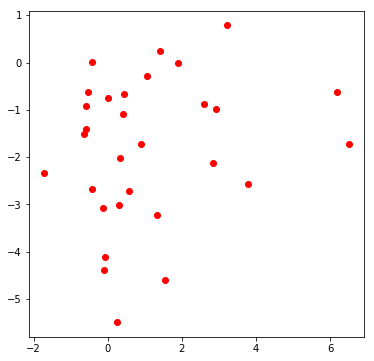

In [8]:
plot_clusters(Y, mus_true, covs_true)

In [9]:
samples = Gamma(torch.ones(D)*2, torch.ones(D)*2).sample((1000,))

(0, 10)

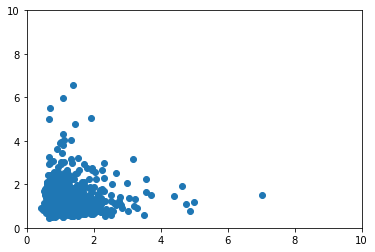

In [10]:
plt.scatter(1./ torch.sqrt(samples).data.numpy()[:, 0], 1. / torch.sqrt(samples).data.numpy()[:, 1])
plt.xlim([0, 10])
plt.ylim([0, 10])

In [11]:
mus_true = torch.zeros((K, D)).float()
for k in range(K):
    if k == 0 :
    mus_true[k] = Uniform(0, boundary).sample((2,)) * torch.from_numpy(np.random.choice([-1, 1], 2)).float()


IndentationError: expected an indented block (<ipython-input-11-607ce0fa9354>, line 4)

In [ ]:
torch.norm(mus_true - next_mus, dim=-1)

In [ ]:
torch.norm(next_mus)